## Introducciòn a Tensor Flow

In [2]:
import tensorflow as tf

In [3]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

res = tf.multiply(x1, x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(res))
sess.close()


[ 6 14 24 36 50]


In [5]:
sess = tf.compat.v1.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [6]:
with tf.compat.v1.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [7]:
config = tf.ConfigProto(log_device_placement = True) #Vincula la sesion, hacer logs a cpu y gpu
config = tf.ConfigProto(allow_soft_placement = True)

ahora todo esta deprecado ... (:

In [8]:
config = tf.compat.v1.ConfigProto(log_device_placement = True) #Vincula la sesion, hacer logs a cpu y gpu
config = tf.compat.v1.ConfigProto(allow_soft_placement = True)

In [9]:
import os
import skimage.data as imd
from skimage import io

In [10]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
    
    
    return images, labels
        

In [11]:
main_dir = "C:\\Users\\Equipo\\Desktop\\python\\machine-learning\\datasets\\belgian\\"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")


In [12]:
images, labels = load_ml_data(train_data_dir)

In [13]:
len(images)

4575

In [14]:
import numpy as np

images = np.array(images)
labels = np.array(labels)

images.size

C:\Users\Equipo\anaconda3\envs\DLpy37\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


4575

In [15]:
images[0] #esta es la primer foto [r/ g/ b]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [16]:
print(labels.ndim)
print(labels.size)
print(set(labels))

1
4575
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


In [17]:
print(images.flags)
print(images.itemsize)
print(images.nbytes)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

8
36600


In [18]:
bits_utilizados = images.nbytes / images.itemsize
bits_utilizados

4575.0

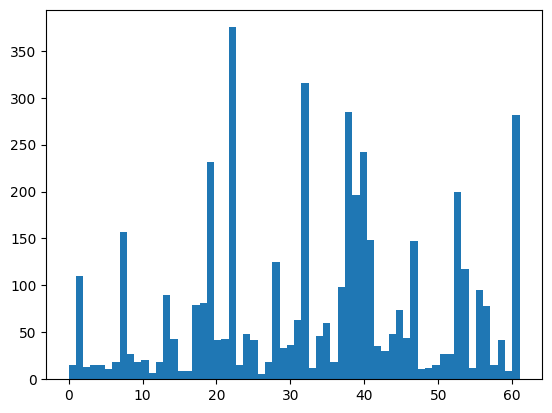

In [19]:
import matplotlib.pyplot as plt

plt.hist(labels, len(set(labels)))
plt.show()

Se aprecia que no de todos los tipos de imagenes tenemos la misma cantidad de fotos, tenemos algunos tipos de imagenes con solo 10 y otras con mas de 350

In [20]:
import random 

rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[2436, 827, 1500, 3393, 2112, 1515]

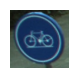

Forma:(100, 100, 3), min:4, max:255


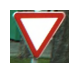

Forma:(98, 107, 3), min:0, max:255


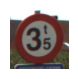

Forma:(120, 118, 3), min:19, max:255


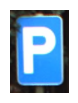

Forma:(130, 91, 3), min:0, max:255


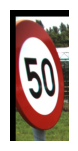

Forma:(490, 218, 3), min:0, max:255


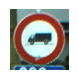

Forma:(83, 80, 3), min:0, max:255


In [21]:
for i in range(len(rand_signs)):
    temp_img = images[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(temp_img)
    plt.subplots_adjust(wspace = 0.5)
    
    plt.show()
    
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_img.shape,
                                              temp_img.min(),
                                              temp_img.max()))

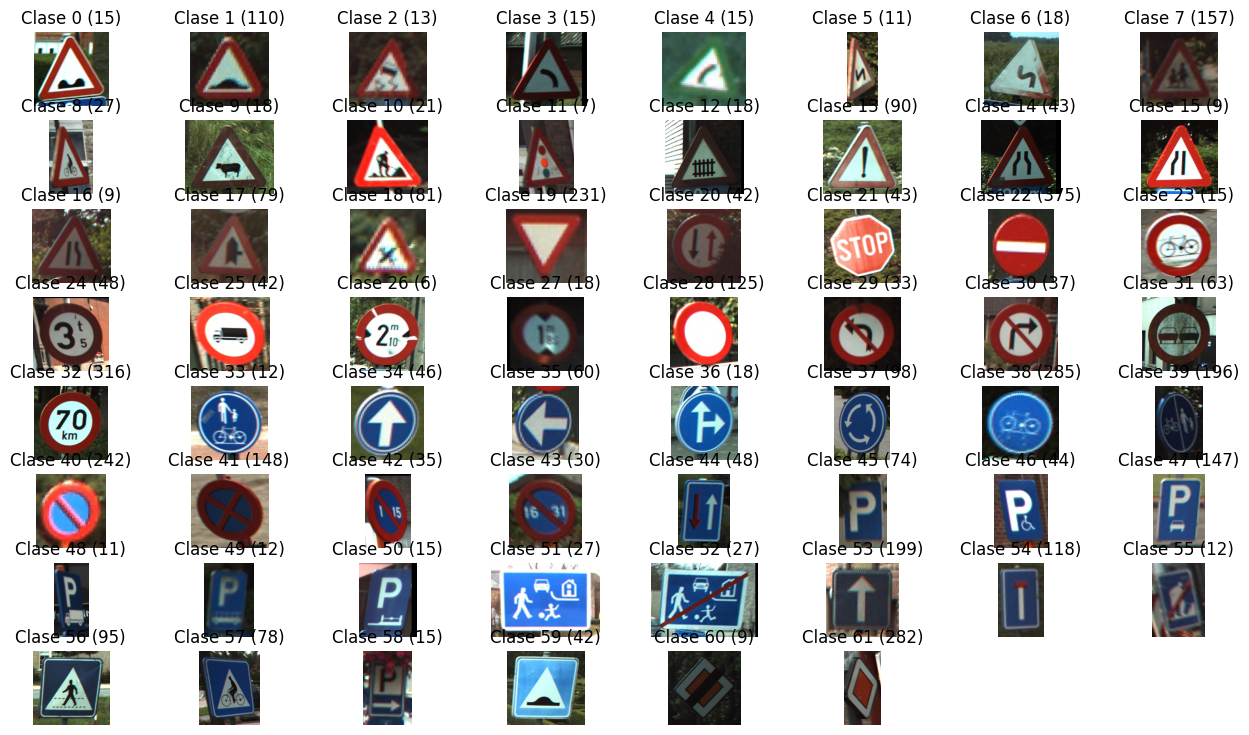

In [22]:
unique_labels = set(labels)
plt.figure(figsize=(16,9))
i = 1

for label in unique_labels:
    temp_img = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis('off')
    plt.title('Clase {0} ({1})'.format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_img)

    
plt.show()

In [23]:
type(labels)

numpy.ndarray

## Modelo de Red Neuronal con TensorFlow
* Las imàgenes no todas son del mismo tamaño
* Hay 62 clades de imágenes(desde 0 hasta 
* La distribución de señales de tráfico no es uniforme (algunas salen más veves que otras)

In [24]:
from skimage import transform

w = 9999 ; h = 9999

for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    
    if image.shape[1] < w:
        w = image.shape[1]
        
print("Tamaño mínimo: {0} x {1}".format(h,w))

Tamaño mínimo: 22 x 20


In [25]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [26]:
images30[0]

array([[[0.72617299, 0.70948591, 0.58075981],
        [0.53098305, 0.41432942, 0.29141543],
        [0.5272036 , 0.40090471, 0.2908441 ],
        ...,
        [0.20208841, 0.23250436, 0.15655625],
        [0.18987811, 0.21619166, 0.14291172],
        [0.19031365, 0.21667514, 0.14615084]],

       [[0.70066467, 0.66386227, 0.53624699],
        [0.50002268, 0.35109058, 0.24119483],
        [0.47173327, 0.32505636, 0.22512709],
        ...,
        [0.19022258, 0.22375315, 0.14641047],
        [0.19379461, 0.23374439, 0.15731982],
        [0.20261837, 0.23098409, 0.16266584]],

       [[0.6931711 , 0.67764916, 0.54258834],
        [0.51086748, 0.44263866, 0.33216345],
        [0.48433774, 0.41275826, 0.3081915 ],
        ...,
        [0.18885797, 0.20843421, 0.13723859],
        [0.19118913, 0.22395978, 0.151307  ],
        [0.19723535, 0.22847228, 0.15918353]],

       ...,

       [[0.09413218, 0.12422257, 0.05126595],
        [0.07892507, 0.11398379, 0.07334726],
        [0.14449476, 0

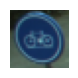

Forma:(30, 30, 3), min:0.05277587195842604, max:0.7589605181840701


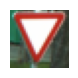

Forma:(30, 30, 3), min:0.055095640770298264, max:0.9999999925766476


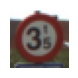

Forma:(30, 30, 3), min:0.10202749401695313, max:1.0


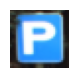

Forma:(30, 30, 3), min:0.05689369606602944, max:0.9999654842570895


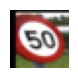

Forma:(30, 30, 3), min:0.0, max:0.9999941188739563


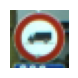

Forma:(30, 30, 3), min:0.04325829158957575, max:0.9999771385171224


In [27]:
for i in range(len(rand_signs)):
    temp_img = images30[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(temp_img)
    plt.subplots_adjust(wspace = 0.5)
    
    plt.show()
    
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_img.shape,
                                              temp_img.min(),
                                              temp_img.max()))

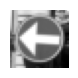

Forma:(30, 30), min:0.06931240125974897, max:0.9999768927550949


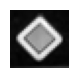

Forma:(30, 30), min:0.08147596250811337, max:0.8305051191500967


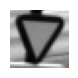

Forma:(30, 30), min:0.17770571124329412, max:0.9765189080978793


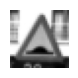

Forma:(30, 30), min:0.1886839100468331, max:0.9999939501576711


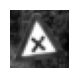

Forma:(30, 30), min:0.0775837489049848, max:0.9995746103130928


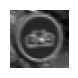

Forma:(30, 30), min:0.05290882592820307, max:0.8289400246833212


In [28]:
from skimage.color import rgb2gray

images30 = np.array(images30)
images30 = rgb2gray(images30)

rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_img = images30[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis('off')
    plt.imshow(temp_img, cmap='gray')
    plt.subplots_adjust(wspace = 0.5)
    
    plt.show()
    
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_img.shape,
                                              temp_img.min(),
                                              temp_img.max()))

In [31]:
x = tf.placeholder(dtype = tf.float32, shape=[None, 30, 30])
y = tf.placeholder(dtype = tf.int32, shape=[None])

images_flat = tf.contrib.layers.flatten(x)

# capa de conexión
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# funcion de perdida
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))

train_opt = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [35]:
print(images_flat)
print(logits)
print(loss)
print(final_pred)

# Esto crea la red neuronal pero aun no la ejecutamos

Tensor("Flatten_2/flatten/Reshape:0", shape=(?, 900), dtype=float32)
Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
Tensor("Mean_3:0", shape=(), dtype=float32)
Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [38]:
tf.compat.v1.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(300):
    print('EPOCH', i)
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    
    if i % 10 == 0:
        print("Epoch: ", i)
        print('Eficacia: ', accuracy_val)
        print("Loss: ", loss)
        
    print("Fin del Epoch", i)

EPOCH 0
Epoch:  0
Eficacia:  28.533115
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
Fin del Epoch 0
EPOCH 1
Fin del Epoch 1
EPOCH 2
Fin del Epoch 2
EPOCH 3
Fin del Epoch 3
EPOCH 4
Fin del Epoch 4
EPOCH 5
Fin del Epoch 5
EPOCH 6
Fin del Epoch 6
EPOCH 7
Fin del Epoch 7
EPOCH 8
Fin del Epoch 8
EPOCH 9
Fin del Epoch 9
EPOCH 10
Epoch:  10
Eficacia:  26.448088
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
Fin del Epoch 10
EPOCH 11
Fin del Epoch 11
EPOCH 12
Fin del Epoch 12
EPOCH 13
Fin del Epoch 13
EPOCH 14
Fin del Epoch 14
EPOCH 15
Fin del Epoch 15
EPOCH 16
Fin del Epoch 16
EPOCH 17
Fin del Epoch 17
EPOCH 18
Fin del Epoch 18
EPOCH 19
Fin del Epoch 19
EPOCH 20
Epoch:  20
Eficacia:  35.606556
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
Fin del Epoch 20
EPOCH 21
Fin del Epoch 21
EPOCH 22
Fin del Epoch 22
EPOCH 23
Fin del Epoch 23
EPOCH 24
Fin del Epoch 24
EPOCH 25
Fin del Epoch 25
EPOCH 26
Fin del Epoch 26
EPOCH 27
Fin del Epoch 27
EPOCH 28
Fin del Epoch 28
EPOCH 29
Fin del E

Fin del Epoch 236
EPOCH 237
Fin del Epoch 237
EPOCH 238
Fin del Epoch 238
EPOCH 239
Fin del Epoch 239
EPOCH 240
Epoch:  240
Eficacia:  35.26951
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
Fin del Epoch 240
EPOCH 241
Fin del Epoch 241
EPOCH 242
Fin del Epoch 242
EPOCH 243
Fin del Epoch 243
EPOCH 244
Fin del Epoch 244
EPOCH 245
Fin del Epoch 245
EPOCH 246
Fin del Epoch 246
EPOCH 247
Fin del Epoch 247
EPOCH 248
Fin del Epoch 248
EPOCH 249
Fin del Epoch 249
EPOCH 250
Epoch:  250
Eficacia:  35.25115
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
Fin del Epoch 250
EPOCH 251
Fin del Epoch 251
EPOCH 252
Fin del Epoch 252
EPOCH 253
Fin del Epoch 253
EPOCH 254
Fin del Epoch 254
EPOCH 255
Fin del Epoch 255
EPOCH 256
Fin del Epoch 256
EPOCH 257
Fin del Epoch 257
EPOCH 258
Fin del Epoch 258
EPOCH 259
Fin del Epoch 259
EPOCH 260
Epoch:  260
Eficacia:  35.253334
Loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
Fin del Epoch 260
EPOCH 261
Fin del Epoch 261
EPOCH 262
Fin del Epoch 262
EPOC

In [ ]:
# No lo correre para no matar mi i3 de 6ta
tf.compat.v1.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(300):
    print('EPOCH', i)
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    
    _, loss_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    
    if i % 10 == 0:
        print("Epoch: ", i)
        print('Eficacia: ', accuracy_val)
        print("Loss: ", loss)
        
    print("Fin del Epoch", i)

## Evaluación de la red neuronal 

In [39]:
sample_idx = random.sample(range(len(images30)), 16)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

sample_labels

[22, 32, 25, 18, 39, 19, 35, 51, 15, 61, 28, 32, 39, 35, 22, 42]

In [41]:
prediction = sess.run([final_pred], feed_dict={
    x: sample_images
})

In [42]:
prediction

[array([22, 32, 32, 18, 38, 19, 38, 13, 13, 61, 28, 32, 39, 28, 22, 42],
       dtype=int64)]

In [43]:
sample_labels

[22, 32, 25, 18, 39, 19, 35, 51, 15, 61, 28, 32, 39, 35, 22, 42]

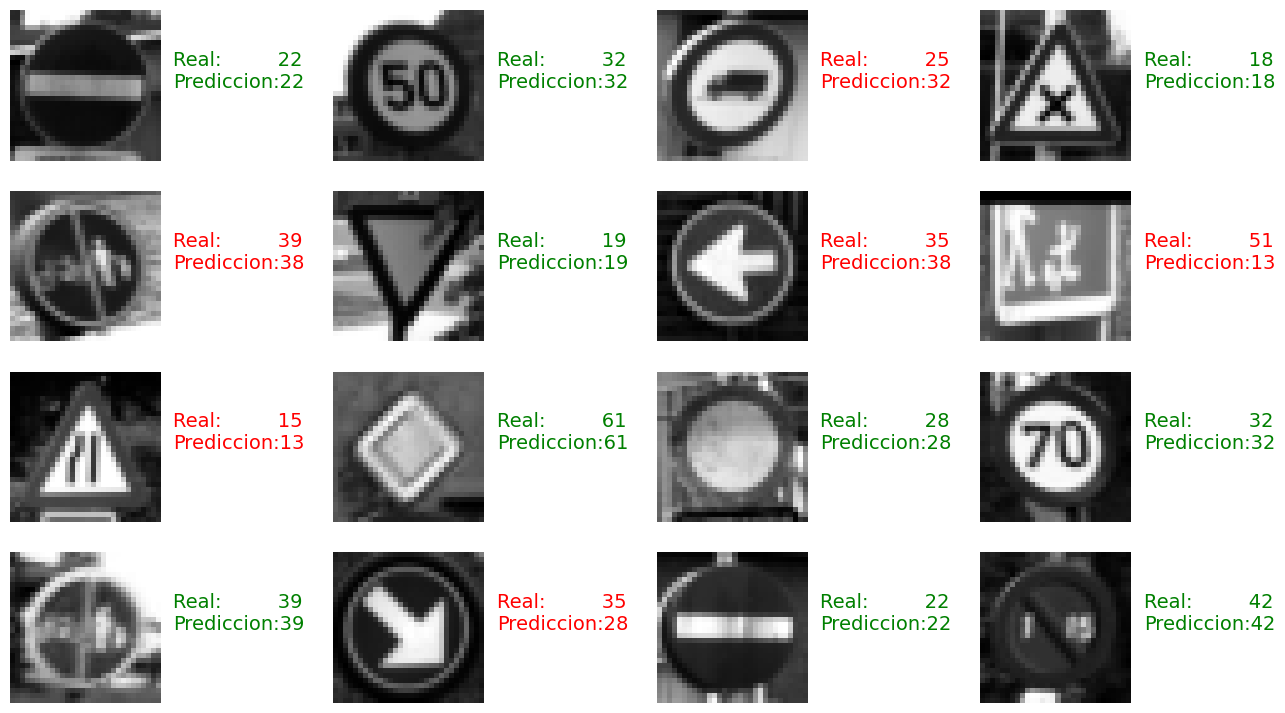

In [55]:
plt.figure(figsize=(16,9))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[0][i]
    plt.subplot(4,4, i+1)
    plt.axis('off')
    color = 'green' if truth==predi else 'red'
    

    plt.text(32, 15, 'Real:         {0}\nPrediccion:{1}'.format(truth, predi),
            fontsize=14, color=color)
    
    plt.imshow(sample_images[i], cmap='gray')

plt.show()

In [56]:
test_images, test_labels = load_ml_data(test_data_dir)

test_images30 = [transform.resize(img,(30,30)) for img in test_images]

In [58]:
test_images30 = rgb2gray(np.array(test_images30))

In [59]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [61]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1458

In [63]:
acc = match_count /  len(test_labels) * 100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 57.86


Esto es una una moneda al aire jeje